<a href="https://colab.research.google.com/github/berkaykocak-cloud/APA2021/blob/main/PredictElectricityLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import svm
%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/energydata_complete.csv', na_values=[' '], parse_dates=['date'])

#Introduction



Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

<br>

---

Variable Description:


* date time year-month-day hour:minute:second 
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chièvres weather station), in Celsius
* Pressure (from Chièvres weather station), in mm Hg
* RH_out, Humidity outside (from Chièvres weather station), in %
* Windspeed (from Chièvres weather station), in m/s
* Visibility (from Chièvres weather station), in km
* Tdewpoint (from Chièvres weather station), °C
* rv1, Random variable 1, nondimensional
* rv2, Rnadom variable 2, nondimensional

Where indicated, data from the nearest airport weather station (Chièvres Airport, Belgium) was downloaded from a public data set from 
Reliable Prognosis, rp5.ru. 

#Explarotary Data Analysis


In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
df.drop(["rv1","rv2"], inplace=True, axis=1)

In [ ]:
# Uppercase the column names
df.columns = [x.upper() for x in df.columns]

# Set datetime index due to time series analysis 
df = df.set_index('DATE')

In [ ]:
#Adding new columns
df['MONTH'] = df.index.month
df['WEEKDAY'] = df.index.weekday
df['HOUR'] = df.index.hour
df['WEEK'] = df.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


Note: the 'Load' is in Watt (W). we want to know the load in time t-1

In [ ]:
df['APPLIANCES-1'] = df['APPLIANCES'].shift(1)

In [ ]:
df['HOUSE_TEMP_LEISUREROOMS'] =(df.T2+df.T4+df.T8+df.T9)/4
df['HOUSE_HUM_LEISUREROOMS'] =(df.RH_2+df.RH_4+df.RH_8+df.RH_9)/4

In [ ]:
# Average house temperature and humidity
# This may not be an okay solution - Alona- different temp and hum i kitchen and bedroom
df['HOUSE_TEMP'] =(df.T1+df.T2+df.T3+df.T4+df.T5+df.T7+df.T8+df.T9)/8
df['HOUSE_HUM'] =(df.RH_1+df.RH_2+df.RH_3+df.RH_4+df.RH_5+df.RH_7+df.RH_8+df.RH_9)/8

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


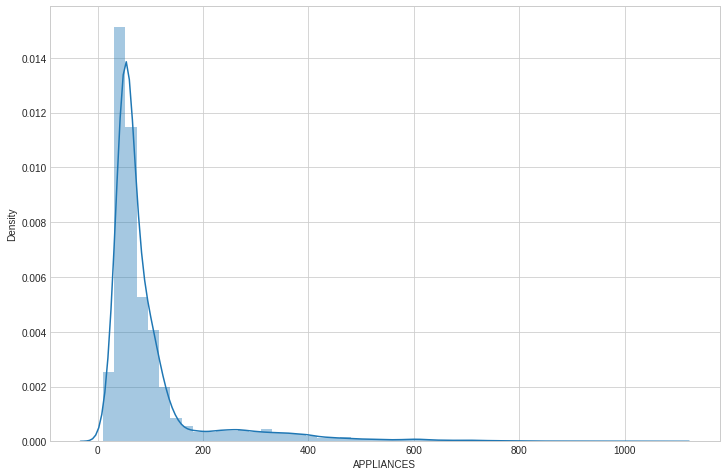

In [ ]:
plt.figure(figsize=(12,8))  # enlarge the figure
# We create one histogram for each numeric variable and illustrate how to set the number of bins
sns.distplot(df['APPLIANCES']);

In [ ]:
df_hour = df.resample('1H').mean()

Text(0, 0.5, 'APPLIANCES CONSUMPTION in WH')

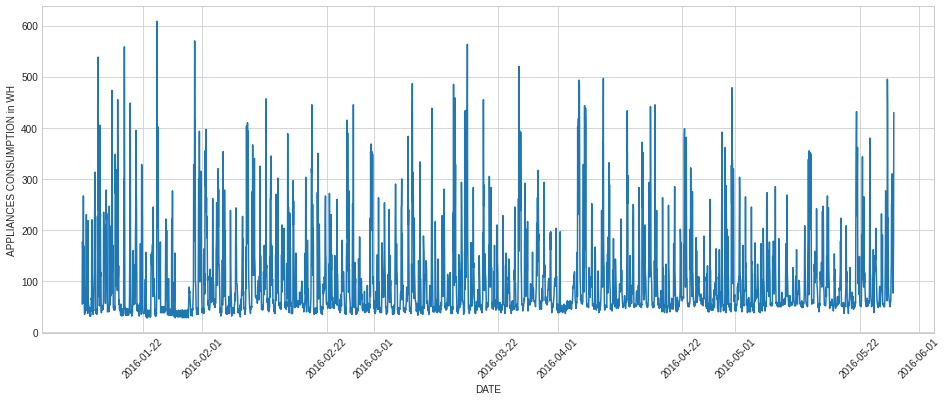

In [ ]:
#The data set is at 10 min for about 4.5 months!
plt.figure(figsize=(16,6))
plt.plot(df_hour.APPLIANCES)
plt.xticks( rotation='45')
plt.xlabel('DATE')
plt.ylabel('APPLIANCES CONSUMPTION in WH')

In [ ]:
# Functions to be used from the plots

def daily(x,df=df):
    return df.groupby('WEEKDAY')[x].mean()
def hourly(x,df=df):
    return df.groupby('HOUR')[x].mean()

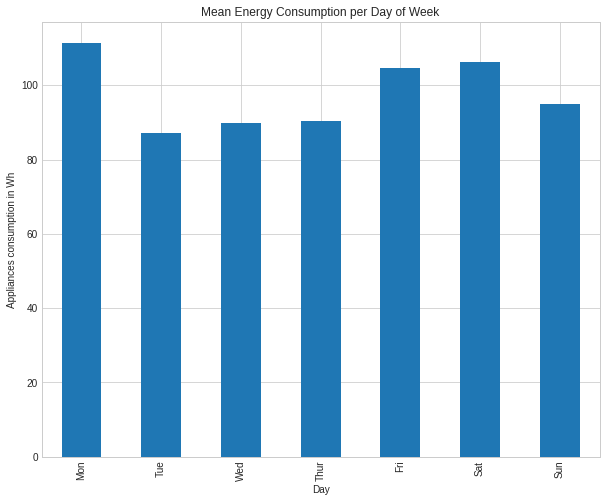

In [ ]:
# Plot of Mean Energy Consumption per Day of Week

daily('APPLIANCES').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tue Wed Thur Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

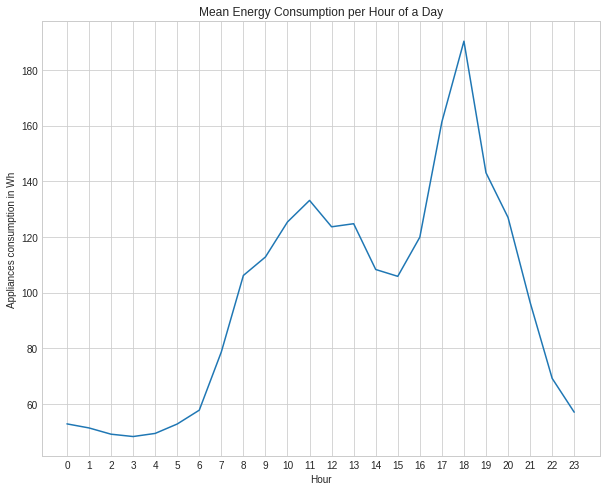

In [ ]:
# Plot of Mean Energy Consumption per Hour of a Day

hourly('APPLIANCES').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

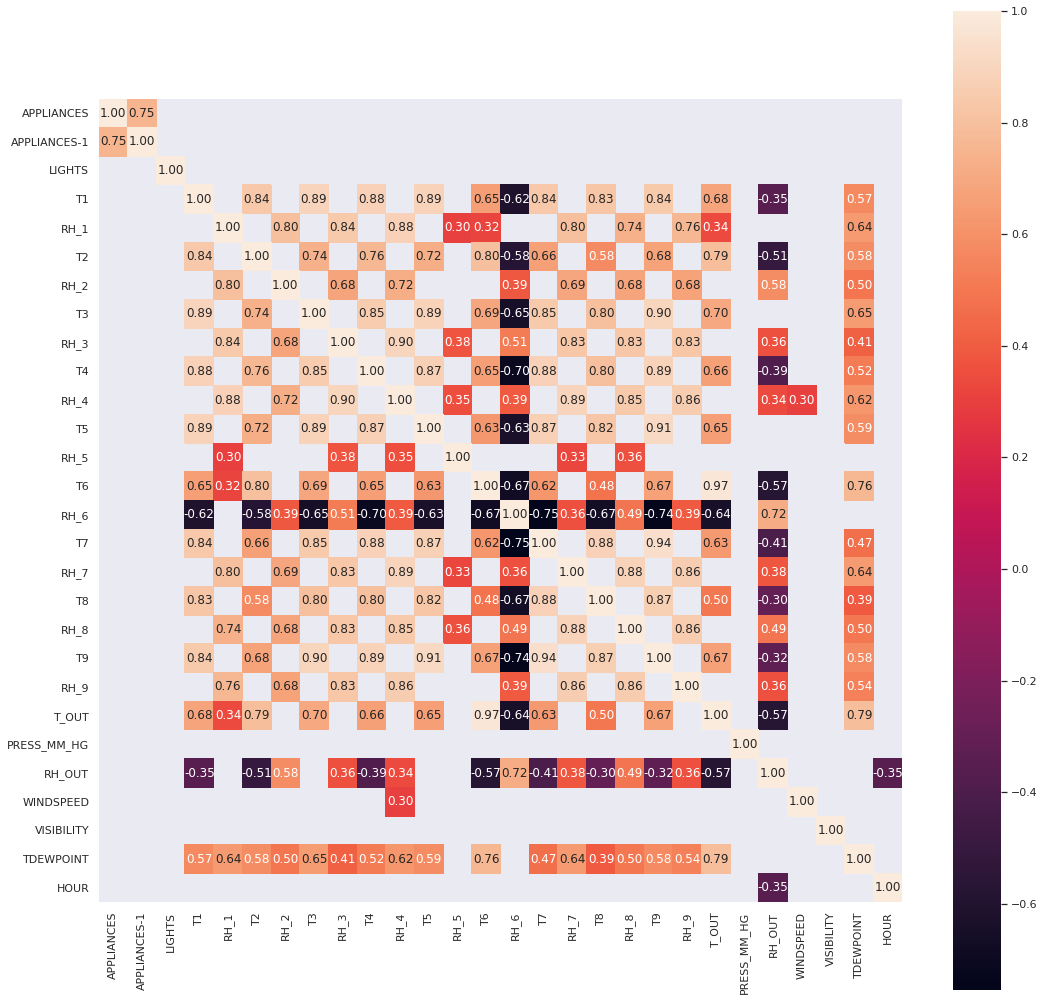

In [ ]:
col = ['APPLIANCES', 'APPLIANCES-1','LIGHTS', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_OUT', 'PRESS_MM_HG', 'RH_OUT', 'WINDSPEED', 'VISIBILITY',
       'TDEWPOINT','HOUR']
corr = df[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)], cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

In [ ]:
df.insert(0,"LOG_APPLIANCES",np.log(df.APPLIANCES))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LOG_APPLIANCES           19735 non-null  float64
 1   APPLIANCES               19735 non-null  int64  
 2   LIGHTS                   19735 non-null  int64  
 3   T1                       19735 non-null  float64
 4   RH_1                     19735 non-null  float64
 5   T2                       19735 non-null  float64
 6   RH_2                     19735 non-null  float64
 7   T3                       19735 non-null  float64
 8   RH_3                     19735 non-null  float64
 9   T4                       19735 non-null  float64
 10  RH_4                     19735 non-null  float64
 11  T5                       19735 non-null  float64
 12  RH_5                     19735 non-null  float64
 13  T6                       19735 non-null  

In [ ]:
# 30 minitues and 1 hour
df_hour = df.resample('1H').mean()
df_30min =df.resample('30min').mean()

In [ ]:
for cat_feature in ['WEEKDAY', 'HOUR']:
    df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1)
    df_30min = pd.concat([df_30min, pd.get_dummies(df_30min[cat_feature])], axis=1)
    df = pd.concat([df, pd.get_dummies(df[cat_feature])], axis=1)

In [ ]:
df_hour.LIGHTS = df_hour.LIGHTS.astype(float)
df_hour.HOUR = df_hour.HOUR.astype(float)
df_hour.WINDSPEED = df_hour.WINDSPEED.astype(float)
df_hour.VISIBILITY = df_hour.VISIBILITY.astype(float)
df_hour.APPLIANCES = df_hour.APPLIANCES.astype(float)
df_hour.T1 = df_hour.T1.astype(float)
df_hour.RH_1 = df_hour.RH_1.astype(float)
df_hour.T2 = df_hour.T2.astype(float)
df_hour.RH_2 = df_hour.RH_2.astype(float)
df_hour.T3 = df_hour.T3.astype(float)
df_hour.RH_3 = df_hour.RH_3.astype(float)
df_hour.T4 = df_hour.T4.astype(float)
df_hour.RH_4 = df_hour.RH_4.astype(float)
df_hour.T5 = df_hour.T5.astype(float)
df_hour.RH_5 = df_hour.RH_5.astype(float)
df_hour.T6 = df_hour.T6.astype(float)
df_hour.RH_6 = df_hour.RH_6.astype(float)
df_hour.T7 = df_hour.T7.astype(float)
df_hour.RH_7 = df_hour.RH_7.astype(float)
df_hour.T8 = df_hour.T8.astype(float)
df_hour.RH_8 = df_hour.RH_8.astype(float)
df_hour.T9 = df_hour.T9.astype(float)
df_hour.RH_9 = df_hour.RH_9.astype(float)

In [ ]:
model_rf = ['LIGHTS','APPLIANCES','T1', 'RH_1','T2','RH_2','T3', 'RH_3', 'T4', 'RH_4','T5', 'RH_5', 'T6', 'RH_6','T7','RH_7', 'T8','RH_8', 'T9', 'RH_9', 'WINDSPEED','VISIBILITY', 'HOUR']

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3290 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Freq: H
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LOG_APPLIANCES           3290 non-null   float64
 1   APPLIANCES               3290 non-null   float64
 2   LIGHTS                   3290 non-null   float64
 3   T1                       3290 non-null   float64
 4   RH_1                     3290 non-null   float64
 5   T2                       3290 non-null   float64
 6   RH_2                     3290 non-null   float64
 7   T3                       3290 non-null   float64
 8   RH_3                     3290 non-null   float64
 9   T4                       3290 non-null   float64
 10  RH_4                     3290 non-null   float64
 11  T5                       3290 non-null   float64
 12  RH_5                     3290 non-null   float64
 13  T6                       3290 non-

In [ ]:
test_size=.2
test_index = int(len(df_hour.dropna())*(1-test_size))
X_train, X_test = df_hour[model_rf].iloc[:test_index,], df_hour[model_rf].iloc[test_index:,]
y_train = df_hour.LOG_APPLIANCES.iloc[:test_index,]

In [ ]:
y_test =  df_hour.LOG_APPLIANCES.iloc[test_index:,]

In [ ]:
from sklearn.preprocessing import StandardScaler
 
# Normalizing of X train and test for each model to mean = 0 and standard deviation = 1
 
scaler = StandardScaler()
 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
rf_model = RandomForestRegressor(bootstrap = True,max_depth = 20, min_samples_leaf =  2,min_samples_split = 10,n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# evaluatin the models

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [ ]:
evaluate(rf_model, X_test, y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

Average Error       : 0.0322 degrees
Variance score R^2  : 98.57%
Accuracy            : 99.31%



In [ ]:
#cross validation
cv = TimeSeriesSplit(n_splits = 10)
 
 
print('Random Forest Model:')
scores = cross_val_score(rf_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Random Forest Model:
Accuracy: 99.96 (+/- 0.02) degrees
R^2: 0.99 (+/- 0.01) degrees


In [ ]:
y_pred = rf_model.predict(X_test)

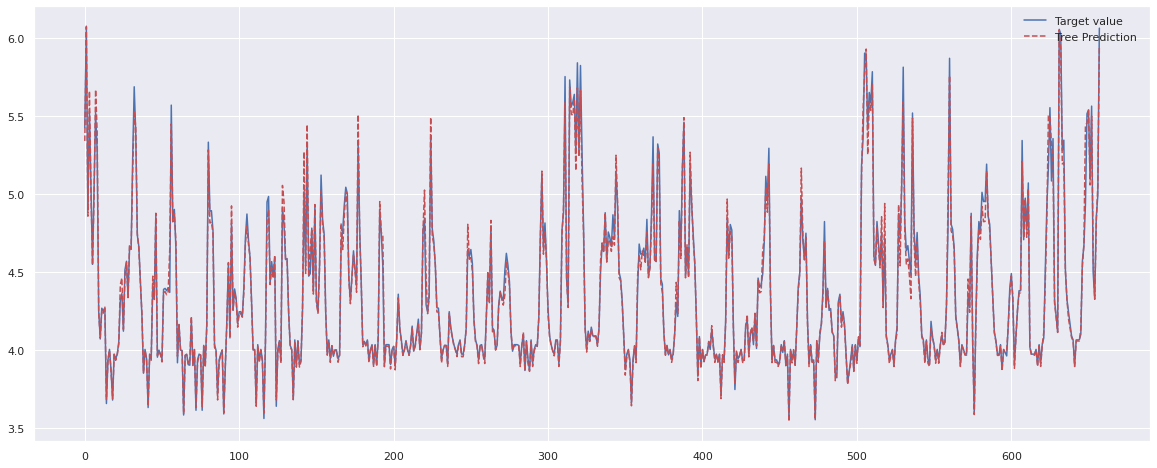

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test.values,label='Target value',color='b')
plt.plot(y_pred,label='Tree Prediction ', linestyle='--', color='r')
 
 
plt.legend(loc=1)

#NEW
Recurrent neural networks are networks with loops in them, allowing information to persist.
LSTMs are a special kind of RNN, capable of learning long-term dependencies.
The key to LSTMs is the cell state, the horizontal line running through the top of the diagram.

The cell state runs straight down the entire chain, with only some minor linear interactions. (easy for information to just flow along it unchanged) The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

Gates are a way to optionally let information through

In [ ]:
%tensorflow_version 1.x

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
np.random.seed(7)

In [ ]:
dataset= df.drop(["T2","RH_2","T4","RH_4","T8", "RH_8",
                    "T9","RH_9"],axis=1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(dataset)

In [ ]:
n = int(len(data)*0.8)
trainY = data[1:n,0]  #(starting from row1 to remove nan value) 
trainX = data[1:n,1:] 
testY = data[n:len(data),0]
testX = data[n:len(data),1:]

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = trainX.reshape((trainX.shape[0], 1, 25))
testX = testX.reshape((testX.shape[0], 1, 25))
print('trainX.shape=', trainX.shape)
print('testX.shape=', testX.shape)

trainX.shape= (15787, 1, 25)
testX.shape= (3947, 1, 25)


In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.005)

model = Sequential()
model.add(LSTM(6, activation='sigmoid',return_sequences=True, input_shape=(1, 25)))
model.add(LSTM(6, activation='sigmoid', input_shape=(1, 25)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(trainX, trainY, validation_split=0.1, epochs=300, batch_size=24, verbose=1)


Train on 14208 samples, validate on 1579 samples
Epoch 1/300
14208/14208 [==============================] - 2s 132us/step - loss: 0.0154 - val_loss: 0.0045
Epoch 2/300
14208/14208 [==============================] - 1s 96us/step - loss: 0.0034 - val_loss: 0.0016
Epoch 3/300
14208/14208 [==============================] - 1s 92us/step - loss: 0.0017 - val_loss: 8.8782e-04
Epoch 4/300
14208/14208 [==============================] - 1s 103us/step - loss: 0.0010 - val_loss: 5.1762e-04
Epoch 5/300
14208/14208 [==============================] - 1s 99us/step - loss: 7.4312e-04 - val_loss: 3.9925e-04
Epoch 6/300
14208/14208 [==============================] - 1s 96us/step - loss: 6.2923e-04 - val_loss: 3.4419e-04
Epoch 7/300
14208/14208 [==============================] - 2s 106us/step - loss: 5.5803e-04 - val_loss: 2.8934e-04
Epoch 8/300
14208/14208 [==============================] - 1s 95us/step - loss: 5.1037e-04 - val_loss: 2.8152e-04
Epoch 9/300
14208/14208 [==============================] - 1

In [ ]:
testPredict = model.predict(testX)

In [ ]:
testY_dn = testY*(df['LOG_APPLIANCES'].max()-df['LOG_APPLIANCES'].min())+df['LOG_APPLIANCES'].min()  

#denormalize the prediction
testPredict_dn = testPredict*(df['LOG_APPLIANCES'].max()-df['LOG_APPLIANCES'].min())+df['LOG_APPLIANCES'].min()

In [ ]:
print(testY_dn.shape)
print(testPredict_dn.shape)
#print(testPredict_dn.ravel().shape)

(3947,)
(3947, 1)


RMSE= 0.010425787297629864


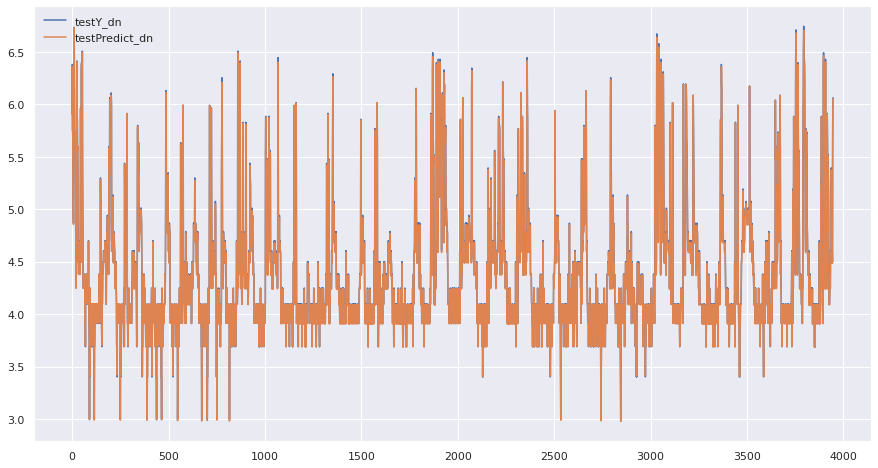

In [ ]:
#plot testY vs testPredict
plt.figure(figsize=(15,8))
plt.plot(testY_dn, label='testY_dn')
plt.plot(testPredict_dn, label='testPredict_dn')
plt.legend(loc='upper left')

#calculate RMSE
RMSE = np.sqrt(np.mean(np.square(testY_dn-testPredict_dn.ravel())))

print('RMSE=',RMSE)


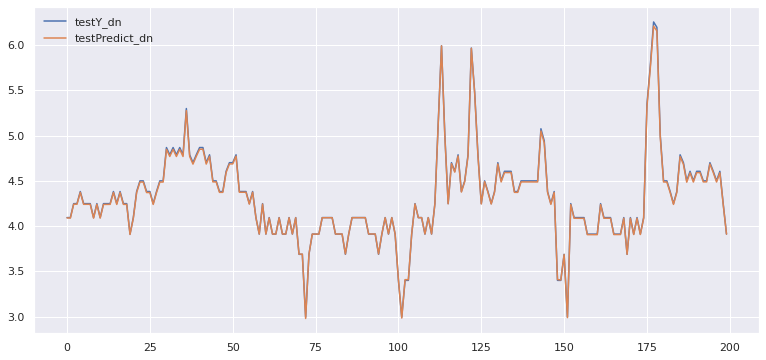

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(testY_dn[600:800], label='testY_dn')
plt.plot(testPredict_dn[600:800], label='testPredict_dn')
plt.legend(loc='upper left')

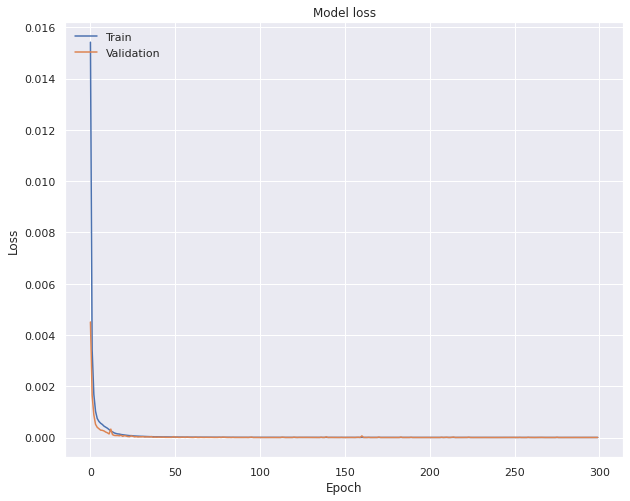

In [ ]:
#Check model loss and validation loss
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# DESIGNING THE AGENT

In [ ]:
#importing necessary libraries

#import pandas as pd
#import numpy as np
#pd.set_option("display.max_columns", None)
#import matplotlib
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import TimeSeriesSplit
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import cross_val_score, cross_val_predict
#from sklearn import metrics
#from sklearn import svm
#%matplotlib inline
#matplotlib.style.use('seaborn-whitegrid')

In [ ]:
#Mounting the data

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Reading the data
#df = pd.read_csv('/content/drive/MyDrive/energydata_complete.csv', na_values=[' '], parse_dates=['date'])

#Dropping unnecessary columns
#df.drop(["rv1","rv2"], inplace=True, axis=1)

# Uppercase the column names(Changing some column names)
#df.columns = [x.upper() for x in df.columns]

# Set datetime index due to time series analysis 
#df = df.set_index('DATE')

These operations will be done to datasets seperately. Some common features will be created for all datasets before using the agent.

In [ ]:
# FOR NOW ALL OPERATIONS ARE DONE BASED ON 1 DATASET. OTHER DATASETS SHOULD BE ADDED AND TRIED IN ADDITION! THE CODE WILL CHANGE ACCORDINGLY
def feature_engineering(data):
  data['MONTH'] = data.index.month
  data['WEEKDAY'] = data.index.weekday
  data['HOUR'] = data.index.hour
  data['WEEK'] = data.index.week
  data['APPLIANCES-1'] = data['APPLIANCES'].shift(1)
  data['AVG_TEMP_LEISUREROOMS'] =(data.T2+data.T4+data.T8+data.T9)/4
  data['AVG_HUM_LEISUREROOMS'] =(data.RH_2+data.RH_4+data.RH_8+data.RH_9)/4
  data['HOUSE_TEMP'] =(data.T1+data.T2+data.T3+data.T4+data.T5+data.T7+data.T8+data.T9)/8
  data['HOUSE_HUM'] =(data.RH_1+data.RH_2+data.RH_3+data.RH_4+data.RH_5+data.RH_7+data.RH_8+data.RH_9)/8
  data.insert(0,"LOG_APPLIANCES",np.log(data.APPLIANCES))
  return data

In [ ]:
def aggregator(data):
  data_hour = data.resample('1H').mean()
  return data_hour

In [ ]:
#HERE A FOR LOOP SHOULD BE ADDED ACCORDING TO DIFFERENT DATASETS AND THEIR DATATYPES.
def set_type(data):
  data.LIGHTS = data.LIGHTS.astype(float)
  data.HOUR = data.HOUR.astype(float)
  data.WINDSPEED = data.WINDSPEED.astype(float)
  data.VISIBILITY = data.VISIBILITY.astype(float)
  data.APPLIANCES = data.APPLIANCES.astype(float)
  data.T1 = data.T1.astype(float)
  data.RH_1 = data.RH_1.astype(float)
  data.T2 = data.T2.astype(float)
  data.RH_2 = data.RH_2.astype(float)
  data.T3 = data.T3.astype(float)
  data.RH_3 = data.RH_3.astype(float)
  data.T4 = data.T4.astype(float)
  data.RH_4 = data.RH_4.astype(float)
  data.T5 = data.T5.astype(float)
  data.RH_5 = data.RH_5.astype(float)
  data.T6 = data.T6.astype(float)
  data.RH_6 = data.RH_6.astype(float)
  data.T7 = data.T7.astype(float)
  data.RH_7 = data.RH_7.astype(float)
  data.T8 = data.T8.astype(float)
  data.RH_8 = data.RH_8.astype(float)
  data.T9 = data.T9.astype(float)
  data.RH_9 = data.RH_9.astype(float)
  return data

In [ ]:
# THE FEATURE SELECTION IS NOT DONE YET. THIS WILL BE IMPROVED. IT SHOULD BE DONE ACCORDING TO MODEL OUTPUTS ETC. PRELIMANRARY!
def feature_selection(data):
  features = ['LIGHTS','APPLIANCES','T1', 'RH_1','T2','RH_2','T3', 'RH_3', 'T4', 'RH_4','T5', 'RH_5', 'T6', 'RH_6','T7','RH_7', 'T8','RH_8', 'T9', 'RH_9', 'WINDSPEED','VISIBILITY', 'HOUR']
  return features

In [ ]:
# HERE WE MAY USE TRAIN_TEST SPLIT FROM SKLEARN DIRECTLY LATER.
def train_test_split(data,features):
   test_size=.2
   test_index = int(len(data.dropna())*(1-test_size))
   X_train, X_test = data[features].iloc[:test_index,], data[features].iloc[test_index:,]
   y_train = data.LOG_APPLIANCES.iloc[:test_index,]
   y_test =  data.LOG_APPLIANCES.iloc[test_index:,]
   return {'X_train': X_train, 'X_test': X_test, 'y_train': y_train,"y_test": y_test}

In [ ]:
def data_scaler(X_train,X_test):
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  return {"X_train": X_train, "X_test": X_test}

In [ ]:
def model1(X_train,y_train):
  rf_model = RandomForestRegressor(bootstrap = True,max_depth = 20, min_samples_leaf =  2,min_samples_split = 10,n_estimators = 100)            
  fitted_model= rf_model.fit(X_train, y_train)
  return fitted_model

In [ ]:
def model2(X_train,y_train):
  svr_model = svm.SVR(gamma='scale')
  fitted_model2= svr_model.fit(X_train,y_train)
  return fitted_model2

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))
    return accuracy

In [ ]:
# EVALUATE & MODEL CHOICE CAN BE MUCH MORE IMPROVED!THERE WILL BE STH ELSE INSTEAD OF IF STATEMENTS! HYPERPARAMETER TUNING SHOULD BE DONE TO THE CHOSEN MODEL
def load_agent(data):
  prepped_data=set_type(aggregator(feature_engineering(data)))
  features= feature_selection(prepped_data)
  results=train_test_split(prepped_data,features)
  X_train=results["X_train"]
  X_test=results["X_test"]
  y_train=results["y_train"]
  y_test=results["y_test"]
  scaled=data_scaler(X_train,X_test)
  X_train=scaled["X_train"]
  X_test=scaled["X_test"]
  model=model1(X_train,y_train)
  model_2=model2(X_train,y_train)
  rf_accuracy=evaluate(model,X_test,y_test) 
  svm_accuracy=evaluate(model_2,X_test,y_test)
  if rf_accuracy>svm_accuracy:
    print('Random forest is the best model')
    print('Accuracy            : {:0.2f}%\n'.format(rf_accuracy))
  else:
    print('SVM is the best model')
    print('Accuracy            : {:0.2f}%\n'.format(svm_accuracy))

#The chosen model will be tuned and 24 hours of predictions will be displayed as an output!

In [ ]:
load_agent(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

Average Error       : 0.0324 degrees
Variance score R^2  : 98.61%
Accuracy            : 99.31%

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Average Error       : 0.2397 degrees
Variance score R^2  : 58.39%
Accuracy            : 94.53%

Random forest is the best model
Accuracy            : 99.31%

